# INFO 250 Information Visualization
## Project 2
    In this project, we reproduced a diagram that had been publicly shared in academic papers. After copying, we analyze the charts according to the principles and guidelines taught in class. Based on the analysis, we also proposed changes to make the visualization more efficient and clear.
## Group 5 Members:


|student_ID  |  Name    |       E-mail      |
|------------|-----------|------------------------|
|320190940790|Yixin Zhang|zhangyixin19@lzu.edu.cn |
|320190940640|Shuaike Xu |  xushk2019@lzu.edu.cn  |
|320190940381|Zeqing Qiu |  qiuzq2019@lzu.edu.cn  |


In [19]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import random

In [20]:
# Our data cover a total of 1,356 months.
num = 1356

In [21]:
maxdatadf = pd.read_csv("maxdata.csv")
maxdata = list(maxdatadf["0"]) # Import the monthly water level data into maxdata.

In [22]:
mindata = maxdata.copy()
for i in range(len(mindata)):
    sep = random.randint(70,90)
    mindata[i] = mindata[i]-sep
# Create two minimum values similar to the original image.
mindata[100] = -100
mindata[670]= -110 

In [23]:
# Define the function that creates Figure 1.
def hourly_sea_level(ax):
    
    sep = -60
    seplist=[]
    step = math.ceil((num+96)/6) # Integer up the result and assign it to step.
    for i in range(7):
        seplist.append(sep)
        sep+=step
    
    # Take a 20-year interval and use it later for set_xticklabels.
    yearlist = [1900+i*20 for i in range(0,7)] 
    # The interval is 20 and is later used for set_yticks.
    ylist = [i*20 for i in range(-5,3)] 
    
    ax.plot([[i for i in range(num)],[i for i in range(num)]],[maxdata,mindata],c="#1f77b4")
    ax.plot(0,0,c="#1f77b4",label="hourly sea level")
    ax.plot([0,num],[-43,-25],c='black',label="linear trend") # The figure sets 'linear trend' to black, but we will change it.
    # Using 'axhline' to generate a dotted line representing '35 cm above MHHW'.
    ax.axhline(y=35,ls="--",c="black",label="35 cm above MHHW")
    ax.plot(maxdata.index(max(maxdata)),max(maxdata)+1,"o",c="darkorange",label="highest recorded") # Darkorange is not enough bold.

    ax.set_xticks(seplist)
    ax.set_xticklabels(yearlist)
    ax.set_xlim(seplist[0],seplist[-1])
    ax.set_ylim(-110,50)
    ax.set_yticks(ylist)
    ax.set_ylabel("cm above MHHW")
    ax.text(-60,53,s="a",fontsize=14)
    ax.set_title("Hourlly sea level: Honolulu Harbor")
    ax.grid()
    ax.legend(framealpha=1,loc="lower right",fontsize=9) # Putting 'Legend' in the bottom right like the original image, but it's bad.

In [32]:
# Define the function that creates Figure 2.
def exdays(ax):
    yearlist = [i for i in range(1900,2021)]
   
    # Exceedance days are created by assigning values to the data in Figure 2.
    dayslist = [0 for i in range(1900,2021)]
    dayslist[69]=dayslist[103]=dayslist[85]=dayslist[110]=3
    dayslist[70]=dayslist[75]=dayslist[93]=dayslist[116]=1
    dayslist[104]=2;dayslist[96]=4;dayslist[117]=15
    
    # Draw a bar chart based on the two lists created above.
    ax.bar(yearlist,dayslist,width=1,label="1905-2016")
    ax.bar(2017,15,color="darkorange",width=1,label="2017")
    ax.text(1900,18,s="b",fontsize=14) # Add diagram serial number.
    ax.set_xlim(1900,2020)
    ax.set_ylim(0,17)
    
    ax.grid()
    ax.legend()
    ax.set_ylabel("${N_{xd}}$")
    ax.set_title("Exceedance days per year > 35cm above MHHW")
    

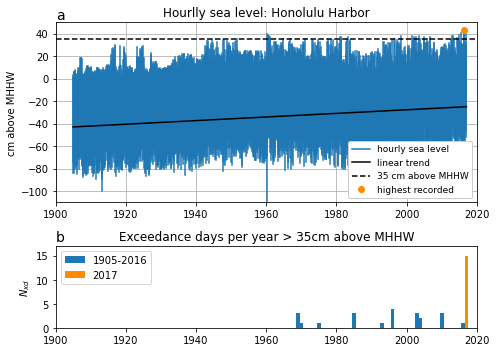

In [33]:
fig,ax = plt.subplots(2,1,figsize = (7,5),gridspec_kw = {'height_ratios':[2.2, 1]})

hourly_sea_level(ax[0])
exdays(ax[1])
plt.tight_layout()
plt.show()

![this is an image](pic.jpg)

# Improvement plan


Legend blocks the content of the chart —— change it to text、annotation.

delete grid.

Change procedual knowledge to red.

Rotate yLabel and add units.




In [30]:
def opt_hourly_sea_level(ax):
    
    sep = -60
    seplist=[]
    step = math.ceil((num+96)/6)
    for i in range(7):
        seplist.append(sep)
        sep+=step
    yearlist = [1900+i*20 for i in range(0,7)]
    ylist = [i*20 for i in range(-5,3)]
    
    ax.plot([[i for i in range(num)],[i for i in range(num)]],[maxdata,mindata],c="#1f77b4")
    ax.plot(0,0,c="#1f77b4",label="hourly sea level")
    ax.plot([0,num],[-43,-25],c='darkorange') 
    ax.axhline(y=35,ls="--",c="black")
    ax.plot(maxdata.index(max(maxdata)),max(maxdata)+1,"o",c="r")

    # We changed the color of 'linear trend' to make it soft and noticeable.
    ax.text(1380,-25,"linear trend",c="darkorange") 
    ax.text(1090,40,"highest recorded",c="r")
    ax.text(1400,33,"35 cm above MHHW")
    
    # ax.annotate('35 cm above MHHW', xy=(300,35), xytext=(384,20),arrowprops=dict(arrowstyle="-"))
    
    ax.set_xticks(seplist)
    ax.set_xticklabels(yearlist)
    ax.set_xlim(seplist[0],seplist[-1])
    ax.set_ylim(-110,50)
    ax.set_yticks(ylist)
    # ax.text(-40,40,"cm above MHHW",c="#424246")
   
    # We adjust ylabel to the horizontal direction
    ax.set_ylabel("cm above\nMHHW",rotation=360,labelpad=20)
    ax.text(-60,53,s="a",fontsize=14)
    ax.set_title("Hourlly sea level: Honolulu Harbor")
     
    # We did not call the 'grid' method to remove the grid.
    
    # Remove the top and right border lines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Put 'Legend' in the best place to avoid obscuring the graphics.
    ax.legend(framealpha=1,loc="best",fontsize=9)

In [27]:
(1930-1905)*12

300

In [28]:
def opt_exdays(ax):
    yearlist = [i for i in range(1900,2021)]
    dayslist = [0 for i in range(1900,2021)]
    dayslist[69]=dayslist[103]=dayslist[85]=dayslist[110]=3
    dayslist[70]=dayslist[75]=dayslist[93]=dayslist[116]=1
    dayslist[104]=2;dayslist[96]=4;dayslist[117]=15
    
    ax.bar(yearlist,dayslist,width=1,label="1905-2016")
    ax.bar(2017,15,color="r",width=1,label="2017")
    ax.text(1900,18,s="b",fontsize=14)
    # We changed from darkorange to a bold red.
    ax.text(2017,15.5,"15",color="r",horizontalalignment ="center")  
    ax.set_xlim(1900,2020)
    ax.set_ylim(0,17)
    
    # We did not call the 'grid' method to remove the grid.
    
    # Remove the top and right border lines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()   
    # We adjust ylabel to the horizontal direction and attach units.
    ax.set_ylabel("${N_{xd}}$\n(days)",rotation=360,labelpad=20,fontsize=12)
    ax.set_title("Exceedance days per year > 35cm above MHHW")

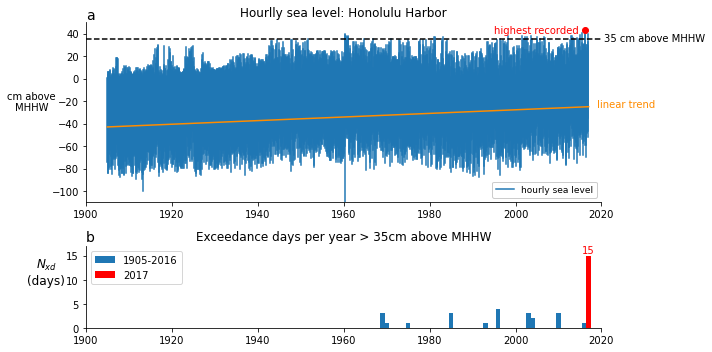

In [31]:
fig,ax = plt.subplots(2,1,figsize = (10,5),gridspec_kw = {'height_ratios':[2.2, 1]})

opt_hourly_sea_level(ax[0])
opt_exdays(ax[1])
plt.tight_layout()
plt.show()